In [2]:
import pandas as pd
import re
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt



In [59]:
coffee_df = pd.read_csv("coffee_ratings.csv")
coffee_df.head()

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,90.58,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,89.92,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,89.75,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,89.00,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,88.83,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [61]:
# drop unnecessary columns for analysis
coffee_df = coffee_df.drop(['owner', 'owner_1', 'lot_number', 'farm_name', 'mill', 'ico_number', 'in_country_partner', 'in_country_partner', 'certification_body', 'certification_address',
                            'certification_contact', ], axis=1)


In [62]:
coffee_df.head()

,total_cup_points,species,country_of_origin,company,altitude,region,producer,number_of_bags,bag_weight,harvest_year,...,moisture,category_one_defects,quakers,color,category_two_defects,expiration,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,90.58,Arabica,Ethiopia,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,2014,...,0.12,0,0.0,Green,0,"April 3rd, 2016",m,1950.0,2200.0,2075.0
1,89.92,Arabica,Ethiopia,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,2014,...,0.12,0,0.0,Green,1,"April 3rd, 2016",m,1950.0,2200.0,2075.0
2,89.75,Arabica,Guatemala,NaN,1600 - 1800 m,NaN,NaN,5,1,NaN,...,0.00,0,0.0,NaN,0,"May 31st, 2011",m,1600.0,1800.0,1700.0
3,89.00,Arabica,Ethiopia,yidnekachew debessa coffee plantation,1800-2200,oromia,Yidnekachew Dabessa Coffee Plantation,320,60 kg,2014,...,0.11,0,0.0,Green,2,"March 25th, 2016",m,1800.0,2200.0,2000.0
4,88.83,Arabica,Ethiopia,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,2014,...,0.12,0,0.0,Green,2,"April 3rd, 2016",m,1950.0,2200.0,2075.0


In [14]:
display(coffee_df.describe())
display(coffee_df.describe(include=['O']))

,total_cup_points,number_of_bags,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,moisture,category_one_defects,quakers,category_two_defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
count,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1338.000000,1339.000000,1109.000000,1109.000000,1109.000000
mean,82.089851,154.182972,7.566706,7.520426,7.401083,7.535706,7.517498,7.518013,9.834877,9.835108,9.856692,7.503376,0.088379,0.479462,0.173393,3.556385,1750.713315,1799.347775,1775.030545
std,3.500575,129.987162,0.377560,0.398442,0.404463,0.379827,0.370064,0.408943,0.554591,0.763946,0.616102,0.473464,0.048287,2.549683,0.832121,5.312541,8669.440545,8668.805771,8668.626080
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,81.080000,14.000000,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.000000,10.000000,7.250000,0.090000,0.000000,0.000000,0.000000,1100.000000,1100.000000,1100.000000
50%,82.500000,175.000000,7.580000,7.580000,7.420000,7.580000,7.500000,7.500000,10.000000,10.000000,10.000000,7.500000,0.110000,0.000000,0.000000,2.000000,1310.640000,1350.000000,1310.640000
75%,83.670000,275.000000,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.000000,10.000000,7.750000,0.120000,0.000000,0.000000,4.000000,1600.000000,1650.000000,1600.000000
max,90.580000,1062.000000,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.000000,10.000000,10.000000,0.280000,63.000000,11.000000,55.000000,190164.000000,190164.000000,190164.000000


,species,country_of_origin,company,altitude,region,producer,bag_weight,harvest_year,grading_date,variety,processing_method,color,expiration,unit_of_measurement
count,1339,1338,1130,1113,1280,1107,1339,1292,1339,1113,1169,1069,1339,1339
unique,2,36,281,396,356,690,56,46,567,29,5,3,566,2
top,Arabica,Mexico,"unex guatemala, s.a.",1100,huila,La Plata,1 kg,2012,"July 11th, 2012",Caturra,Washed / Wet,Green,"July 11th, 2013",m
freq,1311,236,86,43,112,30,331,354,25,256,815,870,25,1157


Variables that need cleaning:
* harvest_year - different date formats 
* altitude - different unit of measurements
* bag_weight - different kinds of measurements. 



In [64]:
coffee_cleaning_date = coffee_df.copy()
coffee_cleaning_date['harvest_year'].unique()

array(['2014', nan, '2013', '2012', 'March 2010',
       'Sept 2009 - April 2010', 'May-August', '2009/2010', '2015',
       '2011', '2016', '2015/2016', '2010', 'Fall 2009', '2017',
       '2009 / 2010', '2010-2011', '2009-2010', '2009 - 2010',
       '2013/2014', '2017 / 2018', 'mmm', 'TEST',
       'December 2009-March 2010', '2014/2015', '2011/2012',
       'January 2011', '4T/10', '2016 / 2017', '23 July 2010',
       'January Through April', '1T/2011', '4t/2010', '4T/2010',
       'August to December', 'Mayo a Julio', '47/2010', 'Abril - Julio',
       '4t/2011', 'Abril - Julio /2011', 'Spring 2011 in Colombia.',
       '3T/2011', '2016/2017', '1t/2011', '2018', '4T72010', '08/09 crop'],
      dtype=object)

In [67]:
# define regex pattern for year
year_pattern = r"^\d{4}$"
date_anomales = coffee_cleaning_date[~coffee_cleaning_date['harvest_year'].astype(str).str.match(year_pattern)]
def extract_year(month):
    match = re.search(r'\b(\d{4})\b', month)
    return match.group(1) if match else month

date_anomales['harvest_year'] = date_anomales['harvest_year'].astype(str).apply(extract_year)
year_pattern = r"\d{4}$"
date_anomales = date_anomales[date_anomales['harvest_year'].astype(str).str.match(year_pattern)]
date_anomales.head()

,total_cup_points,species,country_of_origin,company,altitude,region,producer,number_of_bags,bag_weight,harvest_year,...,moisture,category_one_defects,quakers,color,category_two_defects,expiration,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
2,89.75,Arabica,Guatemala,NaN,1600 - 1800 m,NaN,NaN,5,1,NaN,...,0.00,0,0.0,NaN,0,"May 31st, 2011",m,1600.0,1800.0,1700.0
7,88.67,Arabica,Ethiopia,NaN,1570-1700,oromia,Bazen Agricultural & Industrial Dev't Plc,300,60 kg,March 2010,...,0.03,0,0.0,NaN,0,"September 2nd, 2011",m,1570.0,1700.0,1635.0
8,88.42,Arabica,Ethiopia,NaN,1570-1700,oromiya,Bazen Agricultural & Industrial Dev't Plc,300,60 kg,March 2010,...,0.03,0,0.0,NaN,0,"September 2nd, 2011",m,1570.0,1700.0,1635.0
13,87.92,Arabica,United States (Hawaii),NaN,2000 ft,kona,"Robert, Sharon, Arianna Wood",1,1,Sept 2009 - April 2010,...,0.00,0,0.0,NaN,2,"May 31st, 2011",ft,609.6,609.6,609.6
14,87.83,Arabica,Ethiopia,NaN,1570-1700,oromiya,Bazen Agricultural & Industrial Dev't Plc,300,60 kg,March 2010,...,0.05,0,0.0,NaN,2,"August 31st, 2011",m,1570.0,1700.0,1635.0


In [70]:
date_anomales['harvest_year'].unique()

array(['2010', '2009', '2015', '2013', '2017', '2014', '2011', '2016'],
      dtype=object)

In [78]:
coffee_cleaning_date.update(date_anomales)
coffee_cleaning_date.head()

In [81]:
year_pattern = r"\d{4}$"
coffee_cleaning_date = coffee_cleaning_date[coffee_cleaning_date['harvest_year'].astype(str).str.match(year_pattern)]
coffee_cleaning_date['harvest_year'].unique()

array(['2014', '2013', '2012', '2010', '2009', '2015', '2011', '2016',
       '2017', '2018'], dtype=object)

In [127]:
coffee_cleaning_weight = coffee_cleaning_date.copy()
coffee_cleaning_weight['bag_weight'].unique()

array(['60 kg', '30 kg', '69 kg', '1 kg', '1', '6', '3 lbs', '50 kg',
       '2 lbs', '100 lbs', '15 kg', '2 kg', '2', '70 kg', '19200 kg',
       '5 lbs', '1 kg,lbs', '6 kg', '46 kg', '40 kg', '20 kg', '34 kg',
       '1 lbs', '660 kg', '18975 kg', '12000 kg', '35 kg', '66 kg',
       '80 kg', '5 kg', '25 kg', '59 kg', '18000 kg', '150 lbs',
       '9000 kg', '18 kg', '10 kg', '29 kg', '1218 kg', '4 lbs', '0 kg',
       '13800 kg', '1500 kg', '24 kg', '80 lbs', '8 kg', '3 kg', '350 kg',
       '67 kg', '4 kg', '55 lbs', '100 kg', '130 lbs'], dtype=object)

In [128]:
# double check if it just containts 'kg' and 'lbs'
measurement_type = coffee_cleaning_weight['bag_weight'].apply(lambda s: pd.Series({'measurement_type': s.split(' ')[-1]}))
coffee_cleaning_weight = pd.concat([coffee_cleaning_weight, measurement_type], axis = 1)
measurement_type['measurement_type'].unique()

array(['kg', '1', '6', 'lbs', '2', 'kg,lbs'], dtype=object)

In [130]:
# Replace 'kg', 'lbs', and 'kg,lbs' with an empty string
coffee_cleaning_weight['bag_weight'] = coffee_cleaning_weight['bag_weight'].str.replace('kg', '').str.replace('lbs', '').str.replace('kg,lbs', '')

# Strip any leading/trailing whitespace or extra characters
coffee_cleaning_weight['bag_weight'] = coffee_cleaning_weight['bag_weight'].str.strip(' ,')

# Convert to numeric, setting errors='coerce' to handle any non-numeric cases by converting them to NaN
coffee_cleaning_weight['bag_weight'] = pd.to_numeric(coffee_cleaning_weight['bag_weight'], errors='coerce')

def kg_conversion(row):
    if row['measurement_type'] == 'lbs':
        return row['bag_weight'] * 0.453592
    return row['bag_weight']
coffee_cleaning_weight['bag_weight'] = coffee_cleaning_weight.apply(kg_conversion, axis=1)
coffee_cleaning_weight['bag_weight'] = coffee_cleaning_weight['bag_weight'].round()
coffee_cleaning_weight['bag_weight'] = coffee_cleaning_weight['bag_weight'].astype('int')
coffee_cleaning_weight.head()

,total_cup_points,species,country_of_origin,company,altitude,region,producer,number_of_bags,bag_weight,harvest_year,...,category_one_defects,quakers,color,category_two_defects,expiration,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters,measurement_type
0,90.58,Arabica,Ethiopia,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60,2014,...,0,0.0,Green,0,"April 3rd, 2016",m,1950.0,2200.0,2075.0,kg
1,89.92,Arabica,Ethiopia,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60,2014,...,0,0.0,Green,1,"April 3rd, 2016",m,1950.0,2200.0,2075.0,kg
3,89.00,Arabica,Ethiopia,yidnekachew debessa coffee plantation,1800-2200,oromia,Yidnekachew Dabessa Coffee Plantation,320,60,2014,...,0,0.0,Green,2,"March 25th, 2016",m,1800.0,2200.0,2000.0,kg
4,88.83,Arabica,Ethiopia,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60,2014,...,0,0.0,Green,2,"April 3rd, 2016",m,1950.0,2200.0,2075.0,kg
5,88.83,Arabica,Brazil,NaN,NaN,NaN,NaN,100,30,2013,...,0,0.0,Bluish-Green,1,"September 3rd, 2014",m,NaN,NaN,NaN,kg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,78.75,Robusta,Ecuador,robustasa,NaN,"san juan, playas",Café Robusta del Ecuador S.A.,1,2,2016,...,0,0.0,Blue-Green,1,"January 18th, 2017",m,NaN,NaN,NaN,kg
1335,78.08,Robusta,Ecuador,robustasa,40,"san juan, playas",Café Robusta del Ecuador S.A.,1,2,2016,...,0,0.0,Blue-Green,0,"January 18th, 2017",m,40.0,40.0,40.0,kg
1336,77.17,Robusta,United States,global opportunity fund,795 meters,"kwanza norte province, angola",Cafe Cazengo,1,1,2014,...,0,0.0,NaN,6,"December 23rd, 2015",m,795.0,795.0,795.0,kg
1337,75.08,Robusta,India,cafe politico,NaN,NaN,NaN,1,5,2013,...,20,0.0,Green,1,"August 25th, 2015",m,NaN,NaN,NaN,lbs


In [133]:
coffee_cleaning_weight[coffee_cleaning_weight['measurement_type'] == '1']


,total_cup_points,species,country_of_origin,company,altitude,region,producer,number_of_bags,bag_weight,harvest_year,...,category_one_defects,quakers,color,category_two_defects,expiration,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters,measurement_type
13,87.92,Arabica,United States (Hawaii),NaN,2000 ft,kona,"Robert, Sharon, Arianna Wood",1,1,2009,...,0,0.0,NaN,2,"May 31st, 2011",ft,609.60,609.60,609.60,1
190,84.33,Arabica,Guatemala,NaN,4400-4700 ft,nuevo oriente,Miguel Hernandez,250,1,2009,...,1,0.0,NaN,1,"April 30th, 2011",ft,1341.12,1432.56,1386.84,1


In [138]:
coffee_cleaning_weight['bag_weight'].unique()
coffee_cleaning_weight = coffee_cleaning_weight.drop(['measurement_type'], axis=1)

In [165]:
coffee_cleaning_altitude = coffee_cleaning_weight.copy()
coffee_cleaning_altitude['altitude'].unique()

array(['1950-2200', '1800-2200', nan, '1570-1700', '1795-1850',
       '1855-1955', 'meters above sea level: 1.872',
       'meters above sea level: 1.943', '2000 ft',
       'meters above sea level: 2.080', '1450', '1700-2000m',
       'meters above sea level: 2.019', '1300 msnm', '1320',
       'meters above sea level: 2.112', '1250m', '1950', '1400', '1200',
       '1300', '1750-1800', '1800', 'meters above sea level: 1.941',
       '1.2', '1000 m', '1754', '900-1500m', '1520m-2200m', '1400-1900m',
       '1500-2000 m', '1400ft', '1400-1900', '1800 msnm', '1600',
       '1800-2000', '5000', '4650', '1700 mts', '1500 meters',
       '1300~1400 m.s.l', '1680', '1900m', '5600-5760 metros', '1400 m',
       '1700', '1770', 'above 1600 m', 'above 1200 m', '1550 msnm',
       '1550', '1250-1400 meter', '1400 msm', '2.560 msnm', '2136 msnm',
       '1900', '-1', '1580', '1100m', '1400 masl', '3500-5200 feet',
       'de 1600 a 1950 msnm', '800 m', '1620m', '1200m', '350',
       '1450 msnm

In [355]:
# coffee_cleaning_altitude['altitude'] = coffee_cleaning_altitude['altitude'].astype('str')
# altitude_type = coffee_cleaning_altitude['altitude'].apply(lambda s: pd.Series({'altitude_type': s.split(' ')[-1]}))
# coffee_cleaning_altitude = pd.concat([coffee_cleaning_altitude, altitude_type], axis = 1)
# coffee_cleaning_altitude['altitude_type'].unique()

In [166]:
coffee_cleaning_altitude['altitude'] = coffee_cleaning_altitude['altitude'].astype('str')

import re

def parse_altitude(altitude_str):
    if pd.isna(altitude_str) or altitude_str.strip() == '':
        return None

    # Check if the altitude is specifically marked as '-1' which we treat as missing data
    if altitude_str.strip() == '-1':
        return None

    # Remove common thousands separators and other non-relevant characters
    cleaned_str = re.sub(r"[^\d.-]", "", altitude_str)

    # Extract numbers from the string
    numbers = [float(num) for num in re.findall(r'\d+\.?\d*', cleaned_str)]
    
    # Return the average if it's a range, otherwise return the number
    if len(numbers) > 1:
        return sum(numbers) / len(numbers)
    elif len(numbers) == 1:
        return numbers[0]
    else:
        return None

# Apply the function to the 'altitude' column
coffee_cleaning_altitude['altitude_new'] = coffee_cleaning_altitude['altitude'].apply(parse_altitude).round(2)
coffee_cleaning_altitude.head()



,total_cup_points,species,country_of_origin,company,altitude,region,producer,number_of_bags,bag_weight,harvest_year,...,category_one_defects,quakers,color,category_two_defects,expiration,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters,altitude_new
0,90.58,Arabica,Ethiopia,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60,2014,...,0,0.0,Green,0,"April 3rd, 2016",m,1950.0,2200.0,2075.0,2075.0
1,89.92,Arabica,Ethiopia,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60,2014,...,0,0.0,Green,1,"April 3rd, 2016",m,1950.0,2200.0,2075.0,2075.0
3,89.00,Arabica,Ethiopia,yidnekachew debessa coffee plantation,1800-2200,oromia,Yidnekachew Dabessa Coffee Plantation,320,60,2014,...,0,0.0,Green,2,"March 25th, 2016",m,1800.0,2200.0,2000.0,2000.0
4,88.83,Arabica,Ethiopia,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60,2014,...,0,0.0,Green,2,"April 3rd, 2016",m,1950.0,2200.0,2075.0,2075.0
5,88.83,Arabica,Brazil,NaN,nan,NaN,NaN,100,30,2013,...,0,0.0,Bluish-Green,1,"September 3rd, 2014",m,NaN,NaN,NaN,NaN


In [167]:
coffee_cleaning_altitude['altitude_new'].unique()
coffee_cleaning_altitude[pd.isna(coffee_cleaning_altitude['altitude_new'])]

# we can observe that altitudes that are no value also do not have any other altitude values. Given this is the case, the na values would be removed. Further cleaning considered could be imputation? 


,total_cup_points,species,country_of_origin,company,altitude,region,producer,number_of_bags,bag_weight,harvest_year,...,category_one_defects,quakers,color,category_two_defects,expiration,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters,altitude_new
5,88.83,Arabica,Brazil,NaN,nan,NaN,NaN,100,30,2013,...,0,0.0,Bluish-Green,1,"September 3rd, 2014",m,NaN,NaN,NaN,NaN
6,88.75,Arabica,Peru,richmond investment-coffee department,nan,NaN,HVC,100,69,2012,...,0,0.0,Bluish-Green,0,"September 17th, 2013",m,NaN,NaN,NaN,NaN
17,87.33,Arabica,Ethiopia,NaN,nan,yirgacheffe,Green Gold Ethiopia | Phone: 0114342032,150,6,2009,...,0,0.0,NaN,2,"June 16th, 2011",m,NaN,NaN,NaN,NaN
24,87.08,Arabica,Ethiopia,NaN,nan,sidamo,NaN,100,60,2013,...,0,0.0,Bluish-Green,1,"September 3rd, 2014",m,NaN,NaN,NaN,NaN
26,86.92,Arabica,Ethiopia,NaN,nan,sidamo,Green Gold Ethiopia | Phone: 0114342032,150,6,2009,...,0,0.0,NaN,2,"June 16th, 2011",m,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296,72.58,Arabica,United States (Hawaii),kona pacific farmers cooperative,nan,kona,NaN,11,45,2014,...,5,0.0,Green,9,"March 10th, 2015",ft,NaN,NaN,NaN,NaN
1302,70.67,Arabica,Brazil,volcafe ltda.,nan,cerrado,NaN,305,59,2017,...,0,1.0,Green,55,"October 27th, 2018",m,NaN,NaN,NaN,NaN
1334,78.75,Robusta,Ecuador,robustasa,nan,"san juan, playas",Café Robusta del Ecuador S.A.,1,2,2016,...,0,0.0,Blue-Green,1,"January 18th, 2017",m,NaN,NaN,NaN,NaN
1337,75.08,Robusta,India,cafe politico,nan,NaN,NaN,1,2,2013,...,20,0.0,Green,1,"August 25th, 2015",m,NaN,NaN,NaN,NaN


In [168]:
coffee_cleaning_altitude = coffee_cleaning_altitude.dropna(subset=['altitude_new'])
coffee_cleaning_altitude

,total_cup_points,species,country_of_origin,company,altitude,region,producer,number_of_bags,bag_weight,harvest_year,...,category_one_defects,quakers,color,category_two_defects,expiration,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters,altitude_new
0,90.58,Arabica,Ethiopia,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60,2014,...,0,0.0,Green,0,"April 3rd, 2016",m,1950.0,2200.0,2075.0,2075.0
1,89.92,Arabica,Ethiopia,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60,2014,...,0,0.0,Green,1,"April 3rd, 2016",m,1950.0,2200.0,2075.0,2075.0
3,89.00,Arabica,Ethiopia,yidnekachew debessa coffee plantation,1800-2200,oromia,Yidnekachew Dabessa Coffee Plantation,320,60,2014,...,0,0.0,Green,2,"March 25th, 2016",m,1800.0,2200.0,2000.0,2000.0
4,88.83,Arabica,Ethiopia,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60,2014,...,0,0.0,Green,2,"April 3rd, 2016",m,1950.0,2200.0,2075.0,2075.0
7,88.67,Arabica,Ethiopia,NaN,1570-1700,oromia,Bazen Agricultural & Industrial Dev't Plc,300,60,2010,...,0,0.0,NaN,0,"September 2nd, 2011",m,1570.0,1700.0,1635.0,1635.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1331,80.17,Robusta,India,cafemakers,750m,chikmagalur,Nishant Gurjer,100,2,2014,...,0,0.0,Bluish-Green,1,"May 19th, 2015",m,750.0,750.0,750.0,750.0
1332,80.17,Robusta,India,"cafemakers, llc",750m,chikmagalur,Nishant Gurjer,250,2,2013,...,0,0.0,Green,0,"June 20th, 2014",m,750.0,750.0,750.0,750.0
1333,79.33,Robusta,United States,"cafemakers, llc",3000',chikmagalur,Sethuraman Estates,100,1,2012,...,0,0.0,Green,0,"February 28th, 2013",m,3000.0,3000.0,3000.0,3000.0
1335,78.08,Robusta,Ecuador,robustasa,40,"san juan, playas",Café Robusta del Ecuador S.A.,1,2,2016,...,0,0.0,Blue-Green,0,"January 18th, 2017",m,40.0,40.0,40.0,40.0


In [171]:
coffee_cleaning_altitude.to_csv("test_coffee.csv")



<Axes: xlabel='altitude_new'>

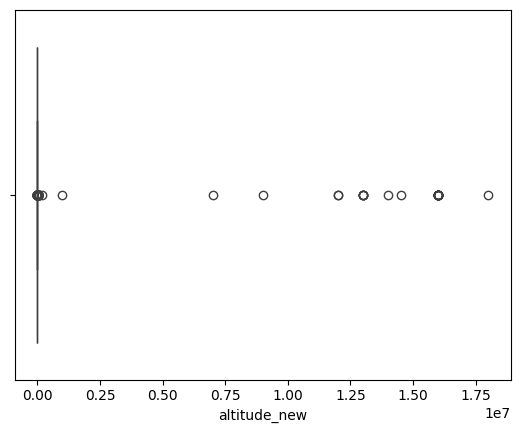

In [248]:
# Removing outliers



import seaborn as sns

# Plot a boxplot to visualize outliers
sns.boxplot(x=coffee_cleaning_altitude['altitude_new'])


In [249]:
Q1 = coffee_cleaning_altitude['altitude_new'].quantile(0.25)
Q3 = coffee_cleaning_altitude['altitude_new'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
filtered_coffee = coffee_cleaning_altitude[(coffee_cleaning_altitude['altitude_new'] >= lower_bound) & (coffee_cleaning_altitude['altitude_new'] <= upper_bound)]
sns.boxplot(x=filtered_coffee['altitude_new'])

,total_cup_points,species,country_of_origin,company,altitude,region,producer,number_of_bags,bag_weight,harvest_year,...,category_one_defects,quakers,color,category_two_defects,expiration,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters,altitude_new
0,90.58,Arabica,Ethiopia,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60,2014,...,0,0.0,Green,0,"April 3rd, 2016",m,1950.0,2200.0,2075.0,2075.0
1,89.92,Arabica,Ethiopia,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60,2014,...,0,0.0,Green,1,"April 3rd, 2016",m,1950.0,2200.0,2075.0,2075.0
3,89.00,Arabica,Ethiopia,yidnekachew debessa coffee plantation,1800-2200,oromia,Yidnekachew Dabessa Coffee Plantation,320,60,2014,...,0,0.0,Green,2,"March 25th, 2016",m,1800.0,2200.0,2000.0,2000.0
4,88.83,Arabica,Ethiopia,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60,2014,...,0,0.0,Green,2,"April 3rd, 2016",m,1950.0,2200.0,2075.0,2075.0
7,88.67,Arabica,Ethiopia,NaN,1570-1700,oromia,Bazen Agricultural & Industrial Dev't Plc,300,60,2010,...,0,0.0,NaN,0,"September 2nd, 2011",m,1570.0,1700.0,1635.0,1635.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1329,80.58,Robusta,Uganda,nitubaasa ltd,1745,western,Kigezi Coffee Farmers Association,20,60,2013,...,0,0.0,Green,2,"June 27th, 2015",m,1745.0,1745.0,1745.0,1745.0
1330,80.50,Robusta,Uganda,mannya coffee project,1200,southern,Mannya coffee project,6,60,2013,...,0,0.0,Green,1,"June 27th, 2015",m,1200.0,1200.0,1200.0,1200.0
1331,80.17,Robusta,India,cafemakers,750m,chikmagalur,Nishant Gurjer,100,2,2014,...,0,0.0,Bluish-Green,1,"May 19th, 2015",m,750.0,750.0,750.0,750.0
1332,80.17,Robusta,India,"cafemakers, llc",750m,chikmagalur,Nishant Gurjer,250,2,2013,...,0,0.0,Green,0,"June 20th, 2014",m,750.0,750.0,750.0,750.0


<Axes: xlabel='altitude_new'>

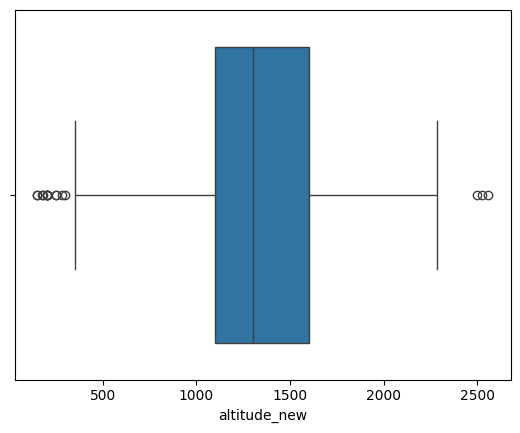

In [250]:
Q1 = filtered_coffee['altitude_new'].quantile(0.25)
Q3 = filtered_coffee['altitude_new'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
filtered_coffee2 = filtered_coffee[(filtered_coffee['altitude_new'] >= lower_bound) & (filtered_coffee['altitude_new'] <= upper_bound)]
sns.boxplot(x=filtered_coffee2['altitude_new'])

## Coffee Quality Analysis

Are coffee beans with higher acidity and flavor ratings more likely to be of high quality

In [313]:
coffee_df2 = filtered_coffee2.copy()
coffee_df2.describe()

,total_cup_points,number_of_bags,bag_weight,aroma,flavor,aftertaste,acidity,body,balance,uniformity,...,sweetness,cupper_points,moisture,category_one_defects,quakers,category_two_defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters,altitude_new
count,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.00000,878.000000,878.000000,878.000000,...,878.000000,878.000000,878.000000,878.000000,877.000000,878.000000,878.000000,878.000000,878.000000,878.000000
mean,82.080786,150.955581,181.875854,7.568781,7.517563,7.401082,7.52033,7.506708,7.501105,9.866173,...,9.876640,7.486970,0.095387,0.400911,0.149373,3.689066,1642.294965,1676.146901,1659.220933,1320.137403
std,3.806459,128.551501,1551.052475,0.402294,0.415504,0.415515,0.40021,0.374680,0.426521,0.541659,...,0.579644,0.473253,0.043815,2.038646,0.756579,5.442779,7359.029308,7358.013133,7358.298979,354.402692
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,157.886400,157.886400,350.000000
25%,81.250000,15.000000,1.000000,7.420000,7.330000,7.250000,7.33000,7.330000,7.330000,10.000000,...,10.000000,7.250000,0.100000,0.000000,0.000000,0.000000,1100.000000,1100.000000,1100.000000,1100.000000
50%,82.500000,150.000000,50.000000,7.580000,7.580000,7.420000,7.50000,7.500000,7.500000,10.000000,...,10.000000,7.500000,0.110000,0.000000,0.000000,2.000000,1300.000000,1350.000000,1320.000000,1308.500000
75%,83.580000,275.000000,60.000000,7.750000,7.750000,7.580000,7.67000,7.670000,7.670000,10.000000,...,10.000000,7.750000,0.120000,0.000000,0.000000,5.000000,1550.000000,1600.000000,1600.000000,1600.000000
max,90.580000,600.000000,18975.000000,8.750000,8.830000,8.670000,8.75000,8.580000,8.750000,10.000000,...,10.000000,9.000000,0.200000,31.000000,11.000000,47.000000,190164.000000,190164.000000,190164.000000,2285.000000


In [341]:
coffee_lr = coffee_df2.copy()
coffee_lr = coffee_lr[['total_cup_points', 'altitude_new', 'aroma', 'flavor', 'aftertaste', 'acidity', 'body', 'balance', 'uniformity', 'clean_cup', 'sweetness']]

# high_quality_threshold = 82.08  # This is just an example threshold
# coffee_lr['quality_label'] = (coffee_lr['total_cup_points'] >= high_quality_threshold).astype(int)

# coffee_lr['high_quality'] = coffee_lr['total_cup_points'].apply(lambda x: 1 if x >= high_quality_threshold else 0)
# coffee_lr.head()

In [342]:
from sklearn.model_selection import train_test_split

# Create binary target variable based on the median threshold
coffee_lr['quality'] = (coffee_lr['total_cup_points'] > 82.5).astype(int)

# Select relevant features
X = coffee_lr.iloc[:, :-1]  # Selects all columns except the last one as features
y = coffee_lr.iloc[:, -1]   # Selects the last column as the target


# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shapes of the splits to confirm everything is as expected
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((614, 11), (264, 11), (614,), (264,))

In [352]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=111)

# Train the logistic regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Predictions on the test set
y_pred = logreg.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

predictions = logreg.predict(X_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))


              precision    recall  f1-score   support

           0       0.78      0.79      0.78       183
           1       0.77      0.75      0.76       169

    accuracy                           0.77       352
   macro avg       0.77      0.77      0.77       352
weighted avg       0.77      0.77      0.77       352

[[145  38]
 [ 42 127]]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [354]:
# it seems it is better to scale our data

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the logistic regression model
logreg_scaled = LogisticRegression(random_state=42)
logreg_scaled.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred = logreg_scaled.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

predictions = logreg_scaled.predict(X_test_scaled)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))


              precision    recall  f1-score   support

           0       0.96      0.98      0.97       183
           1       0.98      0.96      0.97       169

    accuracy                           0.97       352
   macro avg       0.97      0.97      0.97       352
weighted avg       0.97      0.97      0.97       352

[[180   3]
 [  7 162]]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


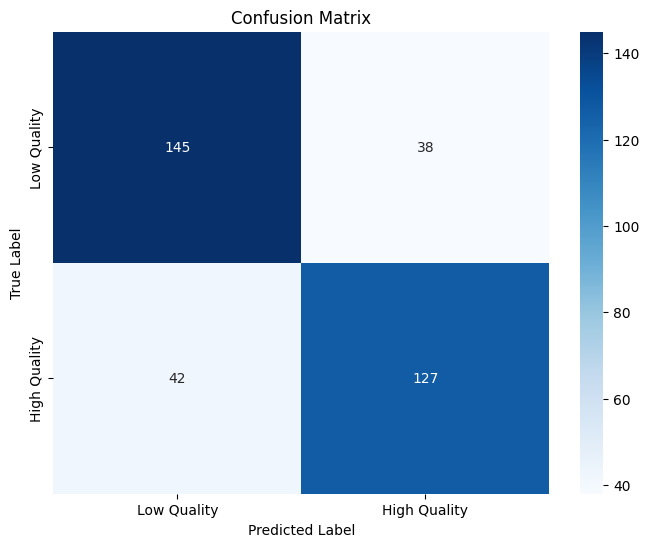

In [348]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Low Quality", "High Quality"], yticklabels=["Low Quality", "High Quality"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
